# Weighted interval scheduling
Following Kleinberg and Tardos


## Problem Description:
 Given a set of activities (or tasks) with start time, finish time and weight, select a compatible (non overlapping) subset of requests so as to maximize the total weight.

## Algorithm Description
Unlike the unweighted case, the greedy algorithm does not work in general. A dynamic solution works well

### 

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations
import matplotlib.patches as patches

## Choose colors

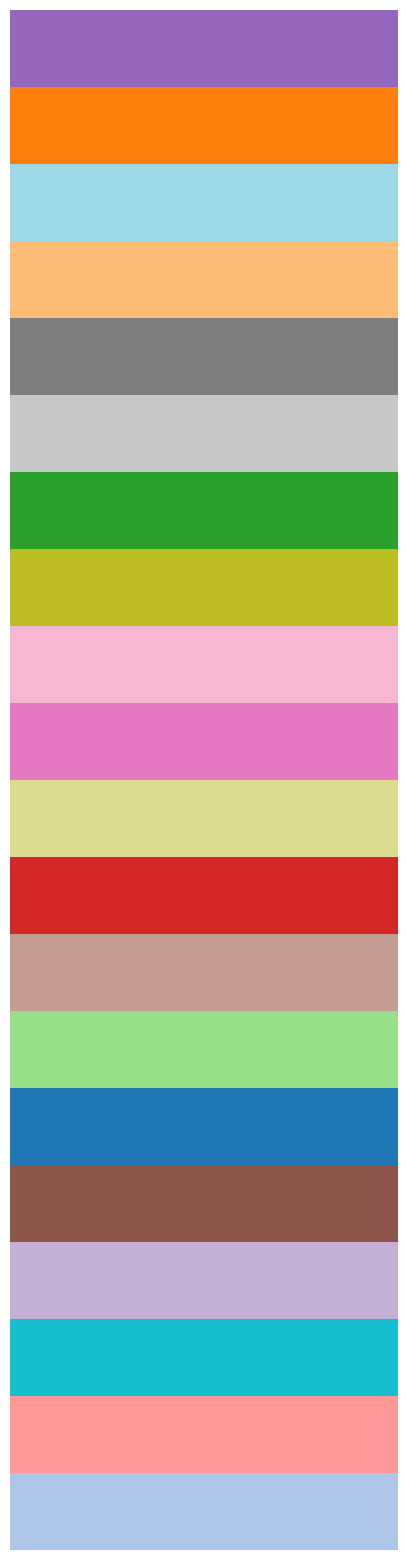

In [10]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)

## Generate instances

In [16]:
def generate_intervals(number_of_intervals=20,min_start=0,max_start=50,max_length=20):
    ans=[]
    for i in range(number_of_intervals):
        line=dict()
        line["start"]=np.random.choice(range(min_start,max_start))
        line["end"]=line["start"]+np.random.choice(range(1,max_length))
        line["weight"]=np.random.choice(range(100))
        ans.append(line)
    ans=sorted(ans,key=lambda x: x['end'])
    for line in ans:
        line["index"]=ans.index(line)
    return ans

## Plot Instance

In [94]:
def plot_instance(instance,color="black"):
    if color=="black":
        color=["black"]*len(instance)

    # Create a new figure and axis object
    fig, ax = plt.subplots()
    lines_data = instance
    # Plot each horizontal line
    for line in lines_data:
        l,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]])
        l.set_linewidth(3)
        l.set_color(color[lines_data.index(line)])
    return plt.show()


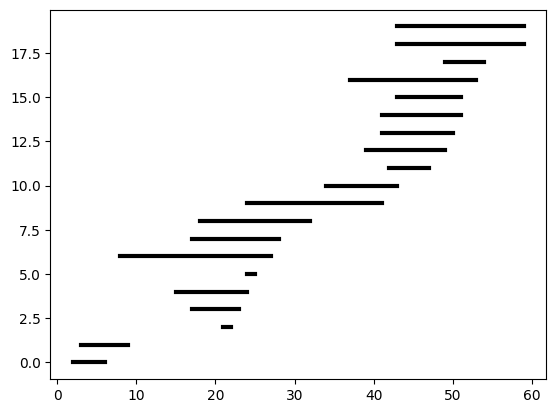

In [96]:
plot_instance(generate_intervals())

## Check collision

In [97]:
def check_collision(x,y):
    ans=True
    if x["start"]>=y["end"] or y["start"]>=x["end"]:
        ans= False
    return ans

## Find previous
In this algorithm the intervals are ordered by finishing time. The previous compatible is the largests
j < i such that interval j is compatible with interval i 

In [98]:
def find_previous(requests):
    previous=dict()
    for i in range(len(requests)):
        candidates=[-1]
        for j in range(i):
            if not check_collision(requests[i],requests[j]):
                candidates.append(j)
        previous[i]=max(candidates)
    return previous

In [132]:
requests=generate_intervals()

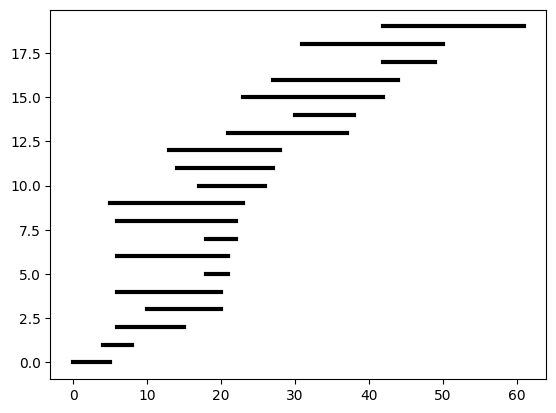

In [131]:
plot_instance(requests)

In [133]:
find_previous(requests)

{0: -1,
 1: 0,
 2: -1,
 3: 2,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 0,
 9: 8,
 10: 7,
 11: 2,
 12: 11,
 13: 8,
 14: 10,
 15: 12,
 16: 10,
 17: 11,
 18: 10,
 19: 11}

### Dynamic algorithsm for weighter interval scheduling

In [134]:
def dynamic_algo_interval(intervals):
    previous=find_previous(intervals)
    answer=dict()
    answer[-1]=[]
    answer[0]=[0]
    for i in range(1,len(intervals)):
        ans=answer[previous[i]]+[i]
        if len(answer[i-1])>len(ans):
            ans=answer[i-1]
        answer[i]=ans
    return answer
    

## Paint answer

In [137]:
def paint_answer(requests):
    N=len(requests)
    remaining=dynamic_algo_interval(requests)[N-1]
    color=["black"]*N
    for i in remaining:
        color[i]="deeppink"

    return plot_instance(requests,color=color)

In [144]:
requests=generate_intervals(number_of_intervals=30)

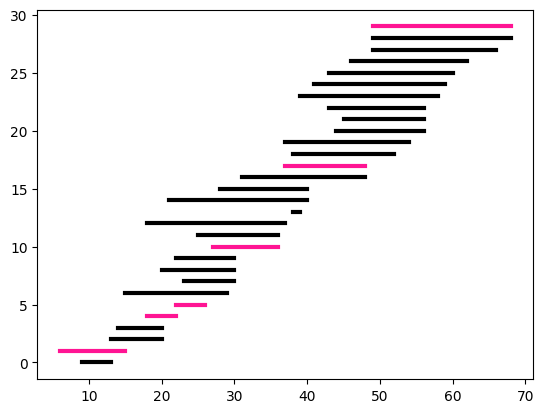

In [145]:
paint_answer(requests)